Importing Libraries

In [156]:
# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.4 For data processing
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


# 1.5 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# 1.6 OS related
import os

# 1.7 for working in ipython
#%matplotlib qt5
#%matplotlib inline

# 1.8 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [157]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
# 1.9
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

# 1.10 Permutation feature importance
from sklearn.inspection import permutation_importance

In [159]:
# 1.11 For generating random numbers:
rng = default_rng()

Reading Data

In [160]:
res=pd.read_csv("Restaurant Revenue Train.csv")

In [161]:
res_test=pd.read_csv("Restaurant Revenue Test.csv")

# Data Exploration

In [162]:
print("\n Shape")
res.shape                # 100039, 33)
print("\n\n Columns")
res.columns.values       # Label column is the last one
print("\n")

# 3.0.1
print("\n\nTarget distribution")
res.revenue.value_counts()  # Classes are not unbalanced
                           # Binary data
                           #  b: 65558 , s: 34242
print("\n")
res.head(3)


 Shape


(137, 43)



 Columns


array(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22',
       'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'], dtype=object)





Target distribution


5787594.0     1
16549064.0    1
3445076.0     1
3273041.0     1
3347767.0     1
5444227.0     1
4066618.0     1
4350573.0     1
3028267.0     1
2740687.0     1
2267425.0     1
4780607.0     1
4882985.0     1
2156098.0     1
3807496.0     1
6941173.0     1
5906596.0     1
3745135.0     1
3956086.0     1
4888774.0     1
7592272.0     1
3261924.0     1
3903884.0     1
2544857.0     1
1904842.0     1
9262754.0     1
2055379.0     1
4590423.0     1
4651866.0     1
4429512.0     1
4758476.0     1
6923131.0     1
1619683.0     1
2551252.0     1
2083447.0     1
3600467.0     1
8630682.0     1
3004429.0     1
3376145.0     1
6694797.0     1
1882131.0     1
4155435.0     1
6363241.0     1
4052733.0     1
3778621.0     1
5595267.0     1
4952255.0     1
3447890.0     1
4286645.0     1
2021934.0     1
1270499.0     1
5525735.0     1
5166635.0     1
3570392.0     1
4264176.0     1
6836483.0     1
4467728.0     1
4250553.0     1
5286212.0     1
6412623.0     1
4491607.0     1
4219263.0     1
4952497.

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  P7  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   5   

   P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  \
0   4   5    5    3    5  5.0    1    2    2    2    4    5    4    1    3   
1   5   5    5    1    5  5.0    0    0    0    0    0    3    2    1    3   
2   5   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1   

   P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  \
0    3    1    1  1.0  4.0  2.0  3.0    5    3    4    5    5    4    3    4   
1    2    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0   

     revenue  
0  5653753.0  
1  6923131.0  
2  2055379.0

To view the first 5 rows of train and test data

In [163]:
res.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  P7  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   5   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   5   

   P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  \
0   4   5    5    3    5  5.0    1    2    2    2    4    5    4    1    3   
1   5   5    5    1    5  5.0    0    0    0    0    0    3    2    1    3   
2   5   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1   
3   8  10   10    8   10  7.5    6    4    9    3   12   20   12    6    1   
4   5   5    5    2    5  5.0    2    1    2    1    4    2    2    1    2   

   P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  \
0    3    1    1  1.0  4.0  2.0  3.0    5    3    4    5    5    4    3    4   
1    2    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0   
3   10    2    2  2.5  2.5  2.5  7.5   25   12   10    6   18   12   12    6   
4    1    2    3  3.0  5.0  1.0  3.0    5    1    3    2    3    4    3    3   

     revenue  
0  5653753.0  
1  6923131.0  
2  2055379.0  
3  2675511.0  
4  4316715.0

In [164]:
res_test.head()

Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   2   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

   P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
0   5   4   5    5    5    3  4.0    0    0    0    2    0    5    5    3   
1   5   3   4    4    2    4  5.0    0    0    0    0    0    5    5    3   
2   5   4   4    5    4    5  5.0    0    0    0    0    0    5    5    5   
3   5   4   5    4    3    4  5.0    0    0    0    0    4    4    4    3   
4   5   4   5    4    3    5  4.0    0    0    0    0    0    1    5    3   

   P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  \
0    1    4    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
1    2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0   
2    5    5    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
3    2    2    0    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0   
4    1    1    0    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0   

   P37  
0    0  
1    0  
2    0  
3    0  
4    0

Note- FC is Food Court
      IL is Inline
      DT is Drive Through

To view the last 5 rows of train and test data

In [165]:
res.tail()

Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  P6  \
132  132  06/25/2008   Trabzon       Other   FC   2  3.0  3.0  5.0   4   2   
133  133  10/12/2006     İzmir  Big Cities   FC   4  5.0  4.0  4.0   2   3   
134  134  07/08/2006   Kayseri       Other   FC   3  4.0  4.0  4.0   2   3   
135  135  10/29/2010  İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2   
136  136  09/01/2009  İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2   

     P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
132   4   4   4    4    4    4  4.0    0    0    0    0    0    4    3    2   
133   5   4   4    5    5    4  5.0    0    0    0    0    0    3    2    2   
134   5   5   5    5    1    5  5.0    0    0    0    0    0    2    3    1   
135   5   5   5    5    2    5  5.0    0    0    0    0    0    1    1    1   
136   5   4   4    5    4    4  5.0    0    0    0    0    0    2    1    1   

     P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  \
132    1    1    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0   
133    1    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0   
134    2    2    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0   
135    1    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0   
136    1    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0   

     P36  P37    revenue  
132    0    0  5787594.0  
133    0    0  9262754.0  
134    0    0  2544857.0  
135    0    0  7217634.0  
136    0    0  6363241.0

In [166]:
res_test.tail()

Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  \
99995  99995  01/05/2000   Antalya       Other   FC   5  5.0  4.0  4.0   2   
99996  99996  07/18/2011     Niğde       Other   IL   1  2.0  4.0  3.0   1   
99997  99997  12/29/2012  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   1   
99998  99998  10/12/2013  İstanbul  Big Cities   FC  12  7.5  6.0  6.0   4   
99999  99999  10/05/2010  İstanbul  Big Cities   IL   2  5.0  4.0  4.0   2   

       P6  P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  \
99995   2   5   5   4    4    4    4  4.0    0    0    0    0    0    3    1   
99996   1   1   5   5    5    2    4  5.0    0    0    0    1    0    1    1   
99997   2   5   3   4    5    5    4  5.0    0    4    4    3    3    3    5   
99998   4  10  10  10   10    6   10  7.5    0    0    0    0    0   20    9   
99999   2   5   5   5    4    4    4  5.0    5    0    0    1    1    5    4   

       P21  P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  \
99995    1    3    2    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0   
99996    1    1    2    0    0  0.0  0.0  1.0  3.0    5    0    0    0    4   
99997    4    5    5    4    4  4.0  3.0  4.0  1.0    5    5    3    2    4   
99998    3    3   15    0    2  0.0  0.0  7.5  5.0    0    0    0    4    0   
99999    1    2    1    5    0  0.0  1.0  5.0  3.0    0    2    0    2    2   

       P35  P36  P37  
99995    0    0    0  
99996    0    0    0  
99997    4    4    2  
99998    0    0    0  
99999    4    2    0

To get the names of columns in train and test data

In [167]:
res.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [168]:
res_test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

To get the basic statistics about the train and test data

In [169]:
res.describe()

Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9         P10         P11  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     3.357664    5.423358    5.153285    5.445255    5.489051    3.262774   
std      2.134235    2.296809    1.858567    1.834793    1.847561    1.910767   
min      1.000000    1.000000    1.000000    4.000000    4.000000    1.000000   
25%      2.000000    5.000000    4.000000    4.000000    5.000000    2.000000   
50%      3.000000    5.000000    5.000000    5.000000    5.000000    3.000000   
75%      4.000000    5.000000    5.000000    5.000000    5.000000    4.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

              P12         P13         P14         P15         P16         P17  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     5.299270    5.080292    1.416058    1.386861    1.941606    1.036496   
std      1.941668    1.036527    2.729583    2.398677    3.505807    2.030679   
min      2.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.000000    5.000000    0.000000    0.000000    0.000000    0.000000   
50%      5.000000    5.000000    0.000000    0.000000    0.000000    0.000000   
75%      5.000000    5.000000    2.000000    2.000000    3.000000    1.000000   
max     10.000000    7.500000   15.000000   10.000000   15.000000   15.000000   

              P18         P19         P20         P21         P22         P23  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     1.941606    4.905109    4.547445    2.270073    2.226277    3.423358   
std      3.300549    5.604467    3.708041    2.052630    1.230690    4.559609   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    2.000000    2.000000    1.000000    1.000000    1.000000   
50%      0.000000    3.000000    4.000000    1.000000    2.000000    2.000000   
75%      4.000000    5.000000    5.000000    3.000000    3.000000    5.000000   
max     12.000000   25.000000   15.000000   15.000000    5.000000   25.000000   

              P24         P25         P26         P27         P28         P29  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     1.372263    1.211679    1.470803    1.145985    3.222628    3.135036   
std      2.304112    2.133179    2.612024    2.067039    2.308806    1.680887   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    2.000000    2.500000   
50%      0.000000    0.000000    0.000000    0.000000    2.500000    3.000000   
75%      2.000000    2.000000    2.500000    2.000000    4.000000    3.000000   
max     10.000000   10.000000   12.500000   12.500000   12.500000    7.500000   

              P30         P31         P32         P33         P34         P35  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     2.729927    1.941606    2.525547    1.138686    2.489051    2.029197   
std      5.536647    3.512093    5.230117    1.698540    5.165093    3.436272   
min      0.000000    0.000000    0.000000

In [170]:
res_test.describe()

Id             P1             P2             P3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       4.088030       4.428085       4.215325   
std     28867.657797       2.812963       1.428865       0.842161   
min         0.000000       1.000000       1.000000       0.000000   
25%     24999.750000       2.000000       3.750000       4.000000   
50%     49999.500000       3.000000       5.000000       4.000000   
75%     74999.250000       4.000000       5.000000       4.000000   
max     99999.000000      15.000000       7.500000       6.000000   

                  P4             P5             P6            P7  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean        4.396025       1.989590       2.881900       5.30051   
std         1.035827       1.065314       1.531429       2.17858   
min         2.000000       1.000000       1.000000       1.00000   
25%         4.000000       1.000000       2.000000       5.00000   
50%         4.000000       2.000000       2.000000       5.00000   
75%         5.000000       2.000000       4.000000       5.00000   
max         7.500000       6.000000      10.000000      10.00000   

                 P8             P9            P10            P11  \
count  100000.00000  100000.000000  100000.000000  100000.000000   
mean        4.93100       5.251380       5.458970       3.311720   
std         1.71849       1.702632       1.763601       2.068118   
min         1.00000       4.000000       4.000000       1.000000   
25%         4.00000       4.000000       5.000000       2.000000   
50%         5.00000       5.000000       5.000000       3.000000   
75%         5.00000       5.000000       5.000000       4.000000   
max        10.00000      10.000000      10.000000      10.000000   

                 P12            P13            P14            P15  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        5.061440       5.086630       1.280090       1.305530   
std         1.765383       0.979339       2.496782       2.166949   
min         2.000000       3.000000       0.000000       0.000000   
25%         4.000000       5.000000       0.000000       0.000000   
50%         5.000000       5.000000       0.000000       0.000000   
75%         5.000000       5.000000       2.000000       2.000000   
max        10.000000       7.500000      15.000000      10.000000   

                 P16            P17            P18            P19  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.747070       1.156880       1.708470       5.191120   
std         3.172012       2.432646       3.030527       5.785529   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       2.000000   
50%         0.000000       0.000000       0.000000       3.000000   
75%         3.000000       2.000000       4.000000       5.000000   
max        15.000000      15.000000      15.000000      25.000000   

                P20            P21            P22           P23  \
count  100000.00000  100000.000000  100000.000000  100000.00000   
mean        4.57086       2.542380       2.430380       3.63998   
std         3.61243       2.526046       1.363184       4.71916   
min         1.00000       1.000000       1.000000       1.00000   
25%         2.00000       1.000000       1.000000       1.00000   
50%         4.00000       2.000000       2.000000       2.00000   
75%         5.00000       3.000000       3.000000       4.00000   
max        15.00000      15.000000       5.000000      25.00000   

                 P24            P25            P26            P27  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.234450       1.244110       1.279665       1.164440   
std         2.097457       2.084731       2.309640       2.179495   
min         0.000000       0.000000       0.00

To get the number of rows and columns in train and test data

In [171]:
res.shape

(137, 43)

In [172]:
res_test.shape

(100000, 42)

To get information about data types of train and test data

In [173]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [174]:
res_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [175]:
#checking for missing values in train dataset
res.isnull(). sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [176]:
# checking for missing values in test dataset
res_test.isnull(). sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

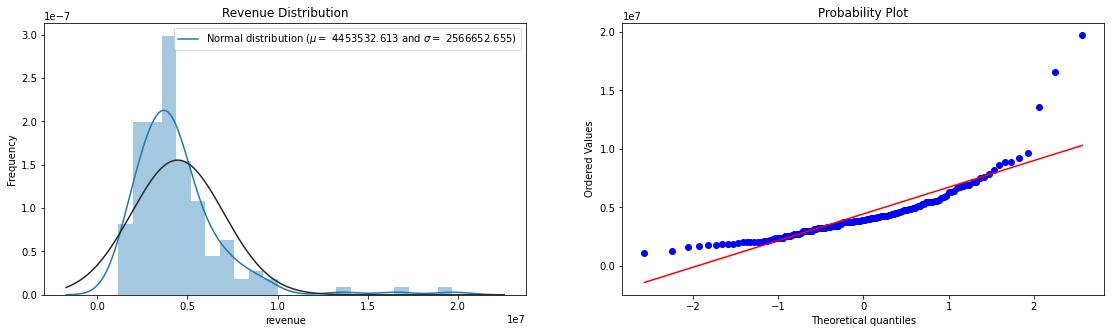

In [177]:
from scipy.stats import norm
from scipy import stats
(mu, sigma) = norm.fit(res['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(res['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(res['revenue'], plot=plt)
f.show();

Observation - The target variable - "Revenue" follows a right-skewed distribution. 
In the next step, we will take log to make it more normally distributed so that linear models can be made.

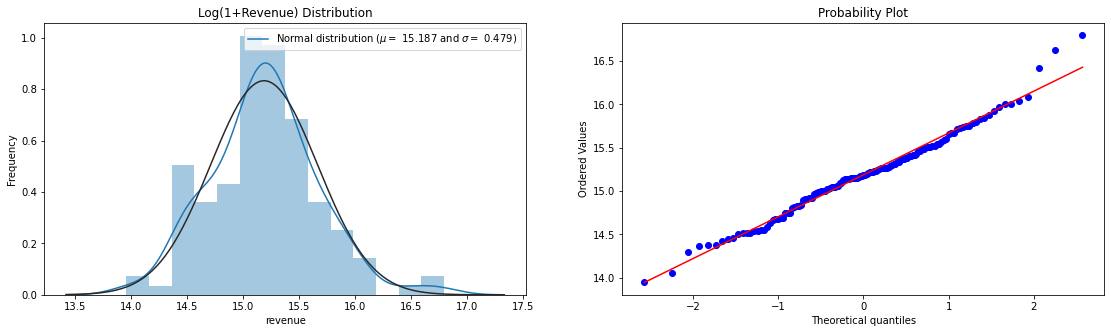

In [178]:
#expm1 on predictions is used to transform revenue
(mu, sigma) = norm.fit(np.log1p(res['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(res['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(res['revenue']), plot=plt)
f.show();

# To get the names of the numeric and categoric features

In [179]:
#To get names of numerical features
numeric = [col for col in res.columns[2:] if res[col].dtypes!='object']
print('numeric columns are:',numeric)

numeric columns are: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


In [180]:
#To get names of categorical features
categorical = [col for col in res.columns if res[col].dtypes=='object']
print('categorical columns are:',categorical)

categorical columns are: ['Open Date', 'City', 'City Group', 'Type']


In [181]:
# Dropping the 'ID' column as it is not significant
res.drop(['Id'], axis=1)

Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0    07/17/1999        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   
1    02/14/2008          Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   
2    03/09/2013      Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   
3    02/02/2012           Tokat       Other   IL   6  4.5  6.0  6.0   4   4   
4    05/09/2009       Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   
5    02/12/2010          Ankara  Big Cities   FC   6  6.0  4.5  7.5   8  10   
6    10/11/2010        İstanbul  Big Cities   IL   2  3.0  4.0  4.0   1   5   
7    06/21/2011        İstanbul  Big Cities   IL   4  5.0  4.0  5.0   2   3   
8    08/28/2010  Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   2   
9    11/16/2011          Edirne       Other   IL   6  4.5  6.0  7.5   6   4   
10   08/09/2013         Kocaeli       Other   FC   9  6.0  6.0  6.0   4   4   
11   05/22/2012        İstanbul  Big Cities   IL   2  4.0  4.0  4.0   2   5   
12   02/28/2013          Ankara  Big Cities   IL   2  2.0  4.0  4.0   2   1   
13   10/16/2010        İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   3   
14   12/29/2011           Bursa       Other   FC   2  2.0  4.0  4.0   1   2   
15   02/07/2012        İstanbul  Big Cities   IL  12  7.5  6.0  6.0   2  10   
16   01/07/2000        İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   5   
17   11/08/2009        İstanbul  Big Cities   FC   2  4.0  4.0  5.0   1   3   
18   04/21/2012           İzmir  Big Cities   IL   4  5.0  4.0  3.0   1   2   
19   08/16/2011         Sakarya       Other   IL   2  4.0  4.0  4.0   2   2   
20   08/25/2010          Elazığ       Other   IL   3  4.0  4.0  4.0   2   2   
21   01/25/2014        İstanbul  Big Cities   FC   5  5.0  4.0  4.0   2   2   
22   07/01/2006         Kayseri       Other   FC   9  6.0  6.0  6.0   4   6   
23   06/03/2009         Sakarya       Other   FC   2  4.0  4.0  4.0   2   2   
24   09/20/2009        İstanbul  Big Cities   IL   5  5.0  3.0  5.0   2   2   
25   12/23/2011       Eskişehir       Other   FC   4  4.0  5.0  5.0   2   2   
26   02/23/2010          Ankara  Big Cities   IL   3  5.0  4.0  5.0   2   3   
27   10/09/1999           Bursa       Other   FC   4  5.0  4.0  3.0   1   2   
28   01/28/1998        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   1   3   
29   10/13/2006          Ankara  Big Cities   FC   1  1.0  4.0  4.0   2   1   
30   12/01/2008         Sakarya       Other   IL   1  1.0  3.0  3.0   2   1   
31   12/31/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   1   3   
32   01/17/2009       Şanlıurfa       Other   FC   3  4.0  3.0  4.0   3   2   
33   04/23/2013          Samsun       Other   FC   2  3.0  4.0  4.0   2   2   
34   03/21/2012        İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   3   
35   05/08/1996           Adana       Other   IL   4  5.0  4.0  3.0   1   2   
36   05/09/2008          Ankara  Big Cities   FC   3  5.0  5.0  3.0   1   5   
37   08/23/2010          Ankara  Big Cities   IL   2  3.0  4.0  3.0   1   5   
38   01/18/2011        İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   5   
39   03/28/2009        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   3   
40   02/09/2011        İstanbul  Big Cities   IL   3  5.0  4.0  4.0   2   2   
41   06/01/2009        İstanbul  Big Cities   IL   4  5.0  5.0  4.0   1   5   
42   09/27/2011        İstanbul  Big Cities   IL  12  7.5  6.0  6.0   4   4   
43   09/24/2009          Ankara  Big Cities   FC   2  4.0  5.0  4.0   1   2   
44   10/13/2004          Ankara  Big Cities   IL   2  3.0  5.0  3.0   1   5   
45   02/02/2012         Antalya       Other   FC   6  6.0  6.0  4.5   2   8   
46   08/25/2011           İzmir  Big Cities   IL   3  5.0  5.0  3.0   1   2   
47   12/23/2009           İzmir  Big Cities   IL   4  5.0  5.0  3.0   1   2   
48   12/21/2011         Kayseri       Other   FC   4  5.0  4.0  4.0   2   2   
49   04/01/2008        İstanbul  Big Cities   FC  12  7.

In [182]:
#To count the cities in both the datasets (train and test)
res['City'].nunique()

34

In [183]:
res_test['City'].nunique()

57

Observation- Train data has more cities as compared to the test data

In [184]:
# To check which city has maximum number of restaurants
res["City"].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Eskişehir          3
Diyarbakır         3
Kayseri            3
Tekirdağ           3
Adana              3
Konya              2
Muğla              2
Aydın              2
Trabzon            2
Bolu               1
Kastamonu          1
Isparta            1
Balıkesir          1
Amasya             1
Edirne             1
Karabük            1
Afyonkarahisar     1
Osmaniye           1
Kütahya            1
Kırklareli         1
Elazığ             1
Uşak               1
Gaziantep          1
Kocaeli            1
Tokat              1
Denizli            1
Şanlıurfa          1
Name: City, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

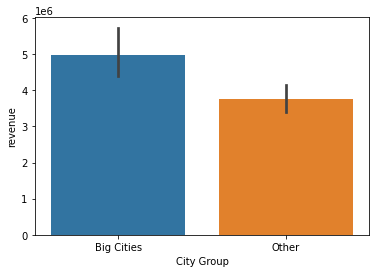

In [185]:
#Plotting revenue sum according to city type
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'City Group',y = 'revenue',data = res)
plt.show()

Observation - Big cities have almost 20% more restaurants than other cities

<AxesSubplot:xlabel='Type', ylabel='revenue'>

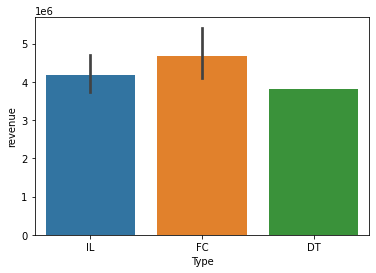

In [186]:
#Plotting revenue sum according to restaurant type
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'Type',y = 'revenue',data = res)
plt.show()

Observation - It can be noted that Food Court (FC) earn the maximum revenue, then Inline Restaurants followed by Drive Through

<AxesSubplot:>

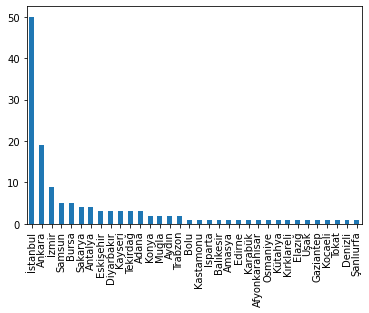

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Eskişehir          3
Diyarbakır         3
Kayseri            3
Tekirdağ           3
Adana              3
Konya              2
Muğla              2
Aydın              2
Trabzon            2
Bolu               1
Kastamonu          1
Isparta            1
Balıkesir          1
Amasya             1
Edirne             1
Karabük            1
Afyonkarahisar     1
Osmaniye           1
Kütahya            1
Kırklareli         1
Elazığ             1
Uşak               1
Gaziantep          1
Kocaeli            1
Tokat              1
Denizli            1
Şanlıurfa          1
Name: City, dtype: int64


In [187]:
# Plot cities in the train dataset as per frequency of occurence
res["City"].value_counts().plot(kind='bar')
plt.show()
print(res["City"].value_counts())

Observation- Istanbul has the maximum number of restaurants as compared to the other cities. 

<AxesSubplot:xlabel='City', ylabel='revenue'>

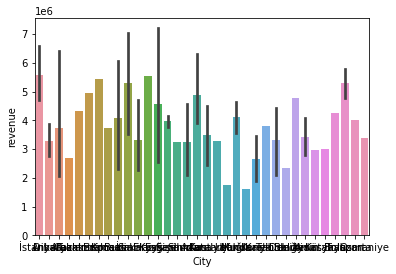

In [188]:
#Plotting revenue sum according to restaurant type
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'City',y = 'revenue',data = res)
plt.show()

<AxesSubplot:xlabel='P1', ylabel='revenue'>

<AxesSubplot:xlabel='P2', ylabel='revenue'>

<AxesSubplot:xlabel='P3', ylabel='revenue'>

<AxesSubplot:xlabel='P4', ylabel='revenue'>

<AxesSubplot:xlabel='P5', ylabel='revenue'>

<AxesSubplot:xlabel='P6', ylabel='revenue'>

<AxesSubplot:xlabel='P7', ylabel='revenue'>

<AxesSubplot:xlabel='P8', ylabel='revenue'>

<AxesSubplot:xlabel='P9', ylabel='revenue'>

<AxesSubplot:xlabel='P10', ylabel='revenue'>

<AxesSubplot:xlabel='P11', ylabel='revenue'>

<AxesSubplot:xlabel='P12', ylabel='revenue'>

<AxesSubplot:xlabel='P13', ylabel='revenue'>

<AxesSubplot:xlabel='P14', ylabel='revenue'>

<AxesSubplot:xlabel='P15', ylabel='revenue'>

<AxesSubplot:xlabel='P16', ylabel='revenue'>

<AxesSubplot:xlabel='P17', ylabel='revenue'>

<AxesSubplot:xlabel='P18', ylabel='revenue'>

<AxesSubplot:xlabel='P19', ylabel='revenue'>

<AxesSubplot:xlabel='P20', ylabel='revenue'>

<AxesSubplot:xlabel='P21', ylabel='revenue'>

<AxesSubplot:xlabel='P22', ylabel='revenue'>

<AxesSubplot:xlabel='P23', ylabel='revenue'>

<AxesSubplot:xlabel='P24', ylabel='revenue'>

<AxesSubplot:xlabel='P25', ylabel='revenue'>

<AxesSubplot:xlabel='P26', ylabel='revenue'>

<AxesSubplot:xlabel='P27', ylabel='revenue'>

<AxesSubplot:xlabel='P28', ylabel='revenue'>

<AxesSubplot:xlabel='P29', ylabel='revenue'>

<AxesSubplot:xlabel='P30', ylabel='revenue'>

<AxesSubplot:xlabel='P31', ylabel='revenue'>

<AxesSubplot:xlabel='P32', ylabel='revenue'>

<AxesSubplot:xlabel='P33', ylabel='revenue'>

<AxesSubplot:xlabel='P34', ylabel='revenue'>

<AxesSubplot:xlabel='P35', ylabel='revenue'>

<AxesSubplot:xlabel='P36', ylabel='revenue'>

<AxesSubplot:xlabel='P37', ylabel='revenue'>

<AxesSubplot:xlabel='revenue', ylabel='revenue'>

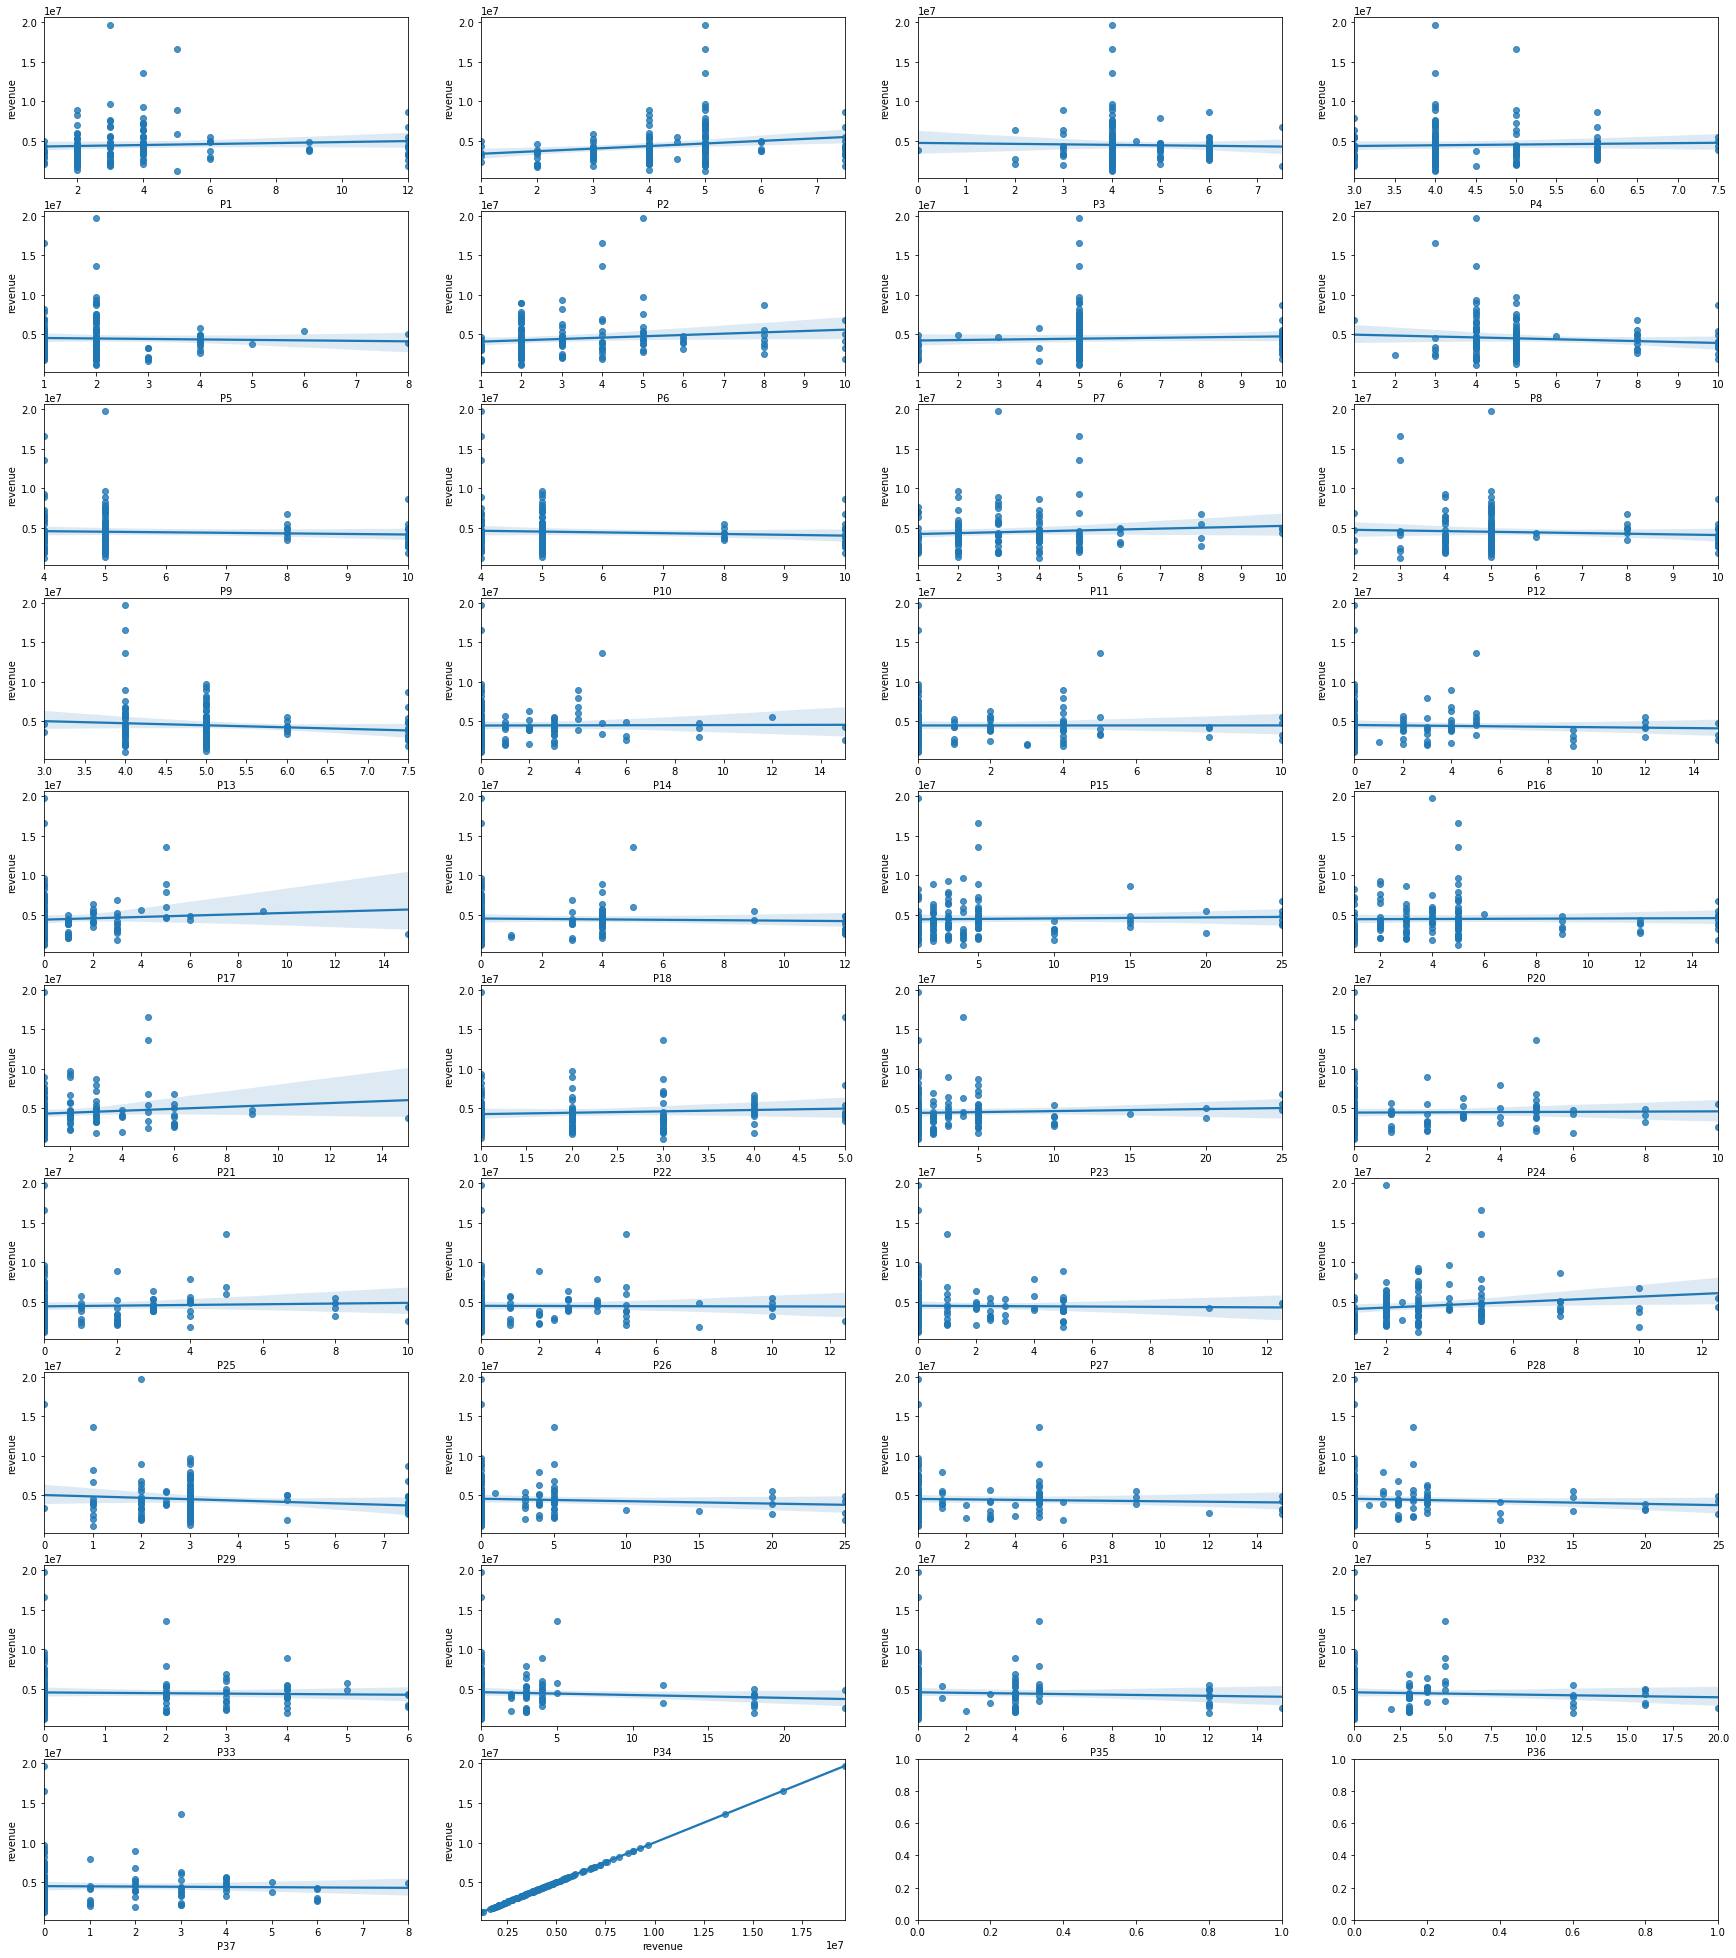

In [189]:
#Analyzing Relationships Between Numerical Variables related to restaurant structure and the target variable
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numeric, ax.flatten()):
    sns.regplot(x=res[variable], y=res['revenue'], ax=subplot)

<AxesSubplot:xlabel='revenue', ylabel='City'>

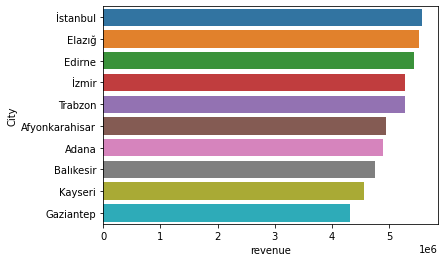

In [190]:
#To find the most revenue making city in the dataset 
cityPerc = res[['City','revenue']].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'],ascending= False)
sns.barplot(x='revenue', y='City', data=newDF.head(10))

<AxesSubplot:>

(0.0, 0.225193468477286)

<AxesSubplot:>

(0.0, 0.34402068027977123)

<AxesSubplot:>

(0.0, 0.6760947869992877)

<AxesSubplot:>

(0.0, 0.5968192919061784)

<AxesSubplot:>

(0.0, 0.4892945591440844)

<AxesSubplot:>

(0.0, 0.2835119234869267)

<AxesSubplot:>

(0.0, 0.35829212933236404)

<AxesSubplot:>

(0.0, 0.3637332943889668)

<AxesSubplot:>

(0.0, 0.41055729043750455)

<AxesSubplot:>

(0.0, 0.41673228344539665)

<AxesSubplot:>

(0.0, 0.2429083941988274)

<AxesSubplot:>

(0.0, 0.3722814957025585)

<AxesSubplot:>

(0.0, 0.6425772508539468)

<AxesSubplot:>

(0.0, 0.28522341717134375)

<AxesSubplot:>

(0.0, 0.3171726156398548)

<AxesSubplot:>

(0.0, 0.21603425451586267)

<AxesSubplot:>

(0.0, 0.3851077816245276)

<AxesSubplot:>

(0.0, 0.22311509959619072)

<AxesSubplot:>

(0.0, 0.1351753574164005)

<AxesSubplot:>

(0.0, 0.1514247608110898)

<AxesSubplot:>

(0.0, 0.3408700832077473)

<AxesSubplot:>

(0.0, 0.3574772593027448)

<AxesSubplot:>

(0.0, 0.16740904751669194)

<AxesSubplot:>

(0.0, 0.3299075317227688)

<AxesSubplot:>

(0.0, 0.3559335348767557)

<AxesSubplot:>

(0.0, 0.29408758702620735)

<AxesSubplot:>

(0.0, 0.3749715912867543)

<AxesSubplot:>

(0.0, 0.2651510464544389)

<AxesSubplot:>

(0.0, 0.439818724747757)

<AxesSubplot:>

(0.0, 0.13930535964684734)

<AxesSubplot:>

(0.0, 0.22039904347650258)

<AxesSubplot:>

(0.0, 0.15230133292072884)

<AxesSubplot:>

(0.0, 0.42441645540061534)

<AxesSubplot:>

(0.0, 0.15603961860571883)

<AxesSubplot:>

(0.0, 0.214571492738104)

<AxesSubplot:>

(0.0, 0.1817233005310529)

<AxesSubplot:>

(0.0, 0.4150018251348505)

<AxesSubplot:>

(0.0, 2.2362589580815184e-07)

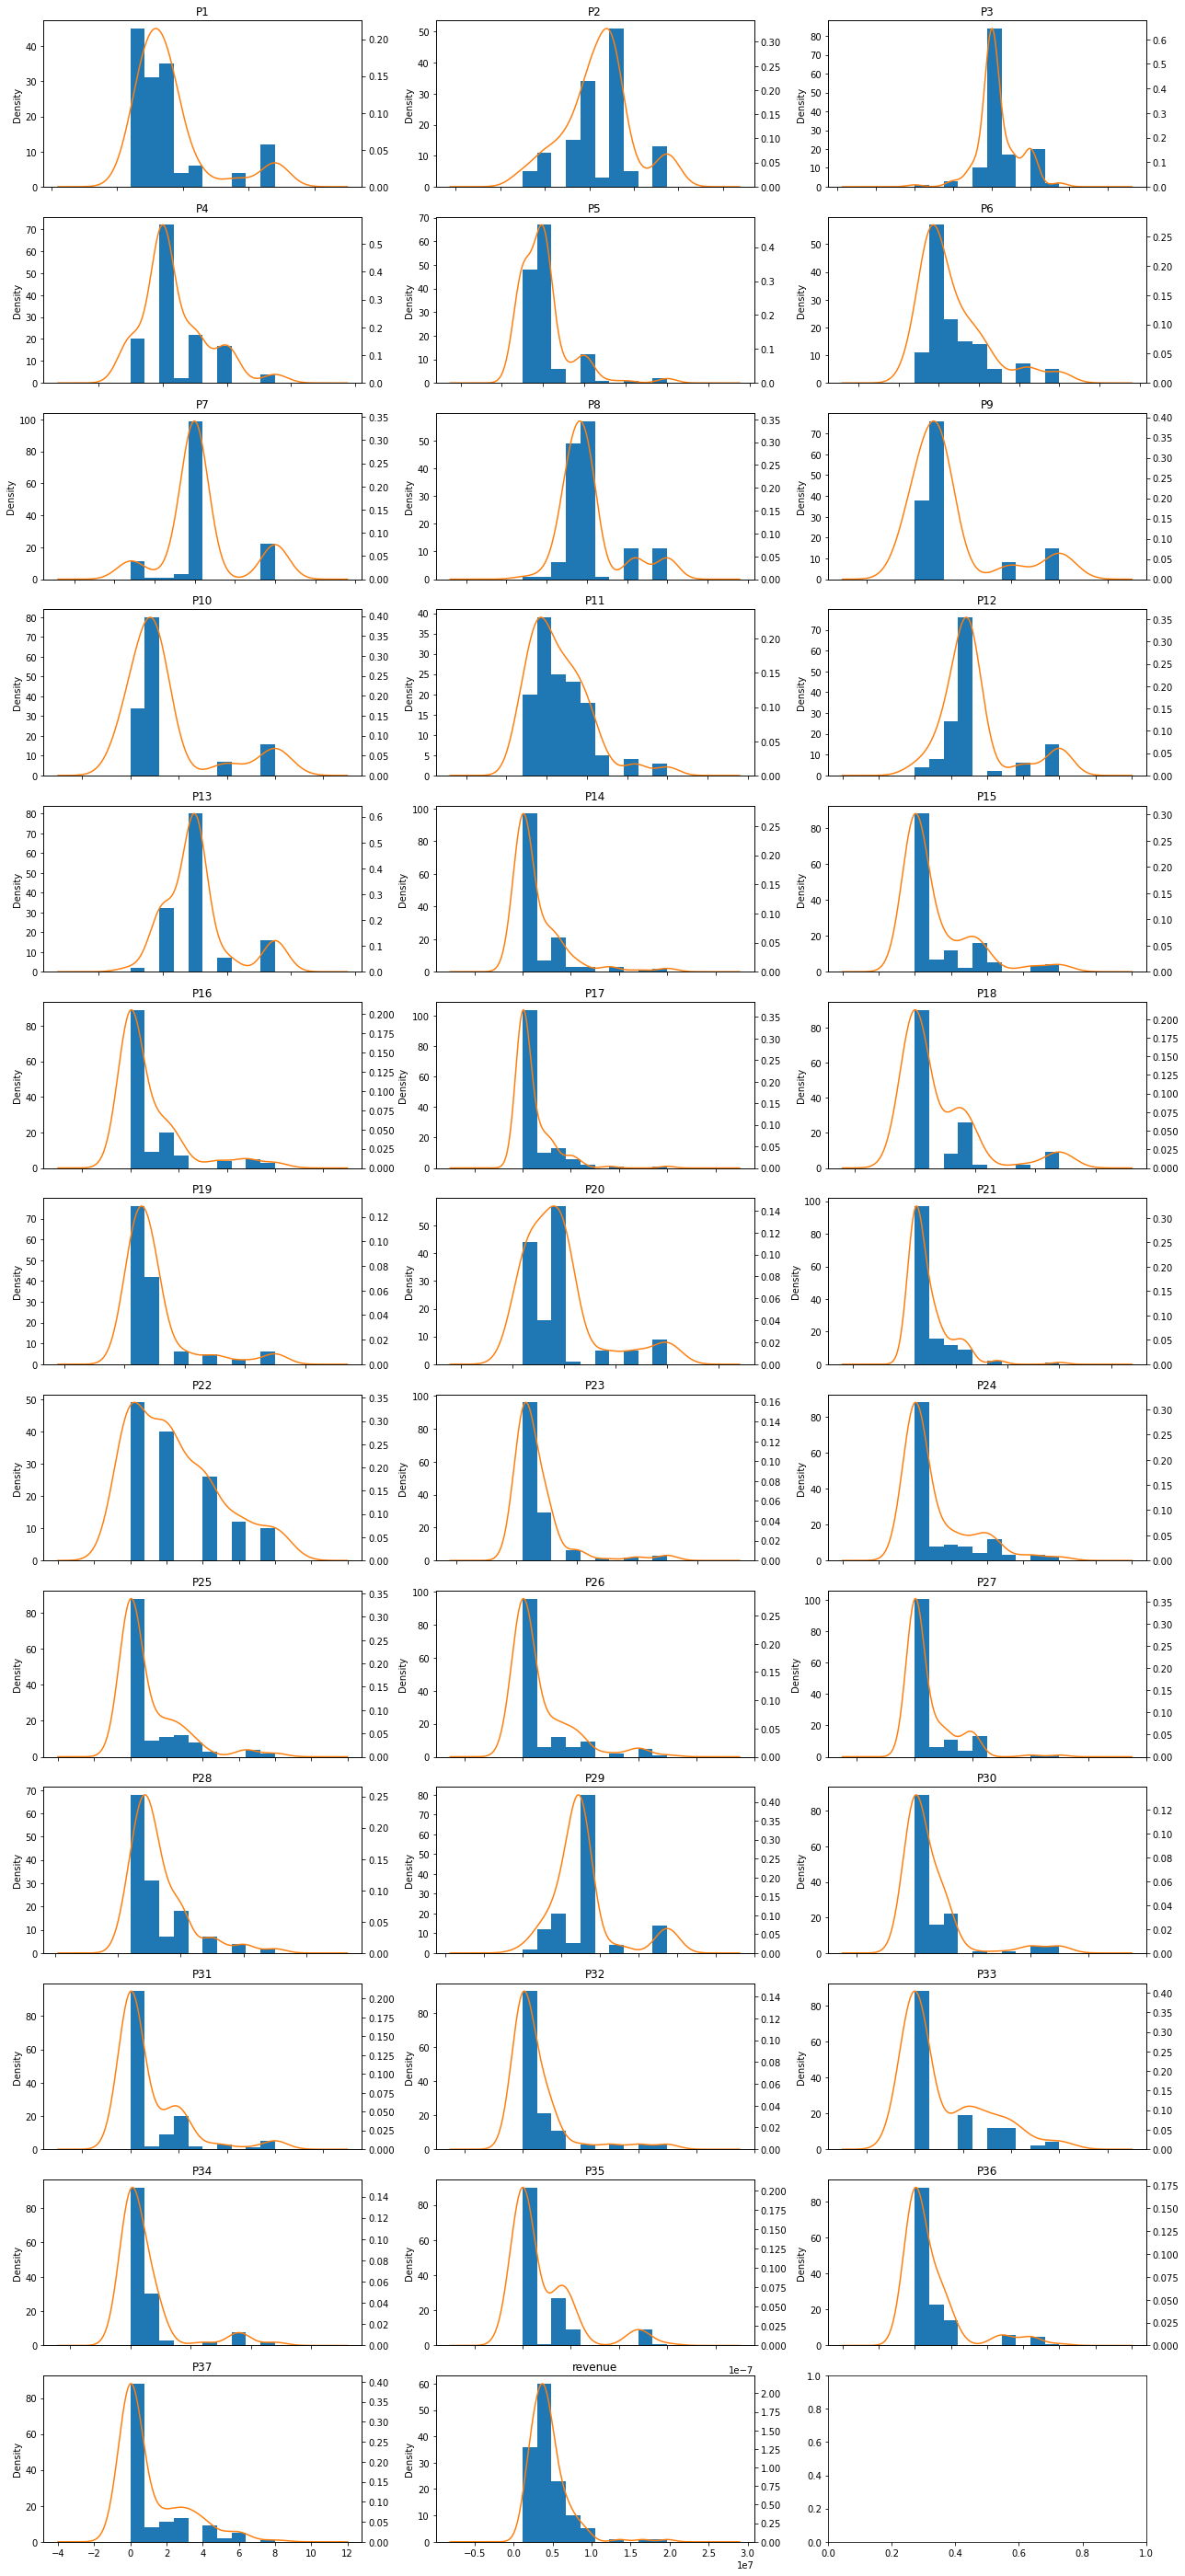

In [191]:
n = len(res[numeric].columns)
w = 3
h = (n - 1) // w + 1
fig, axes = plt.subplots(h, w, figsize=(w * 6, h * 3))
for i, (name, col) in enumerate(res[numeric].items()):
    r, c = i // w, i % w
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

<AxesSubplot:xlabel='Open Date', ylabel='total_revenue'>

Text(0.5, 0, 'Open Date')

Text(0, 0.5, 'Total Revenue')

<AxesSubplot:xlabel='City', ylabel='total_revenue'>

Text(0.5, 0, 'City')

Text(0, 0.5, 'Total Revenue')

<AxesSubplot:xlabel='City Group', ylabel='total_revenue'>

Text(0.5, 0, 'City Group')

Text(0, 0.5, 'Total Revenue')

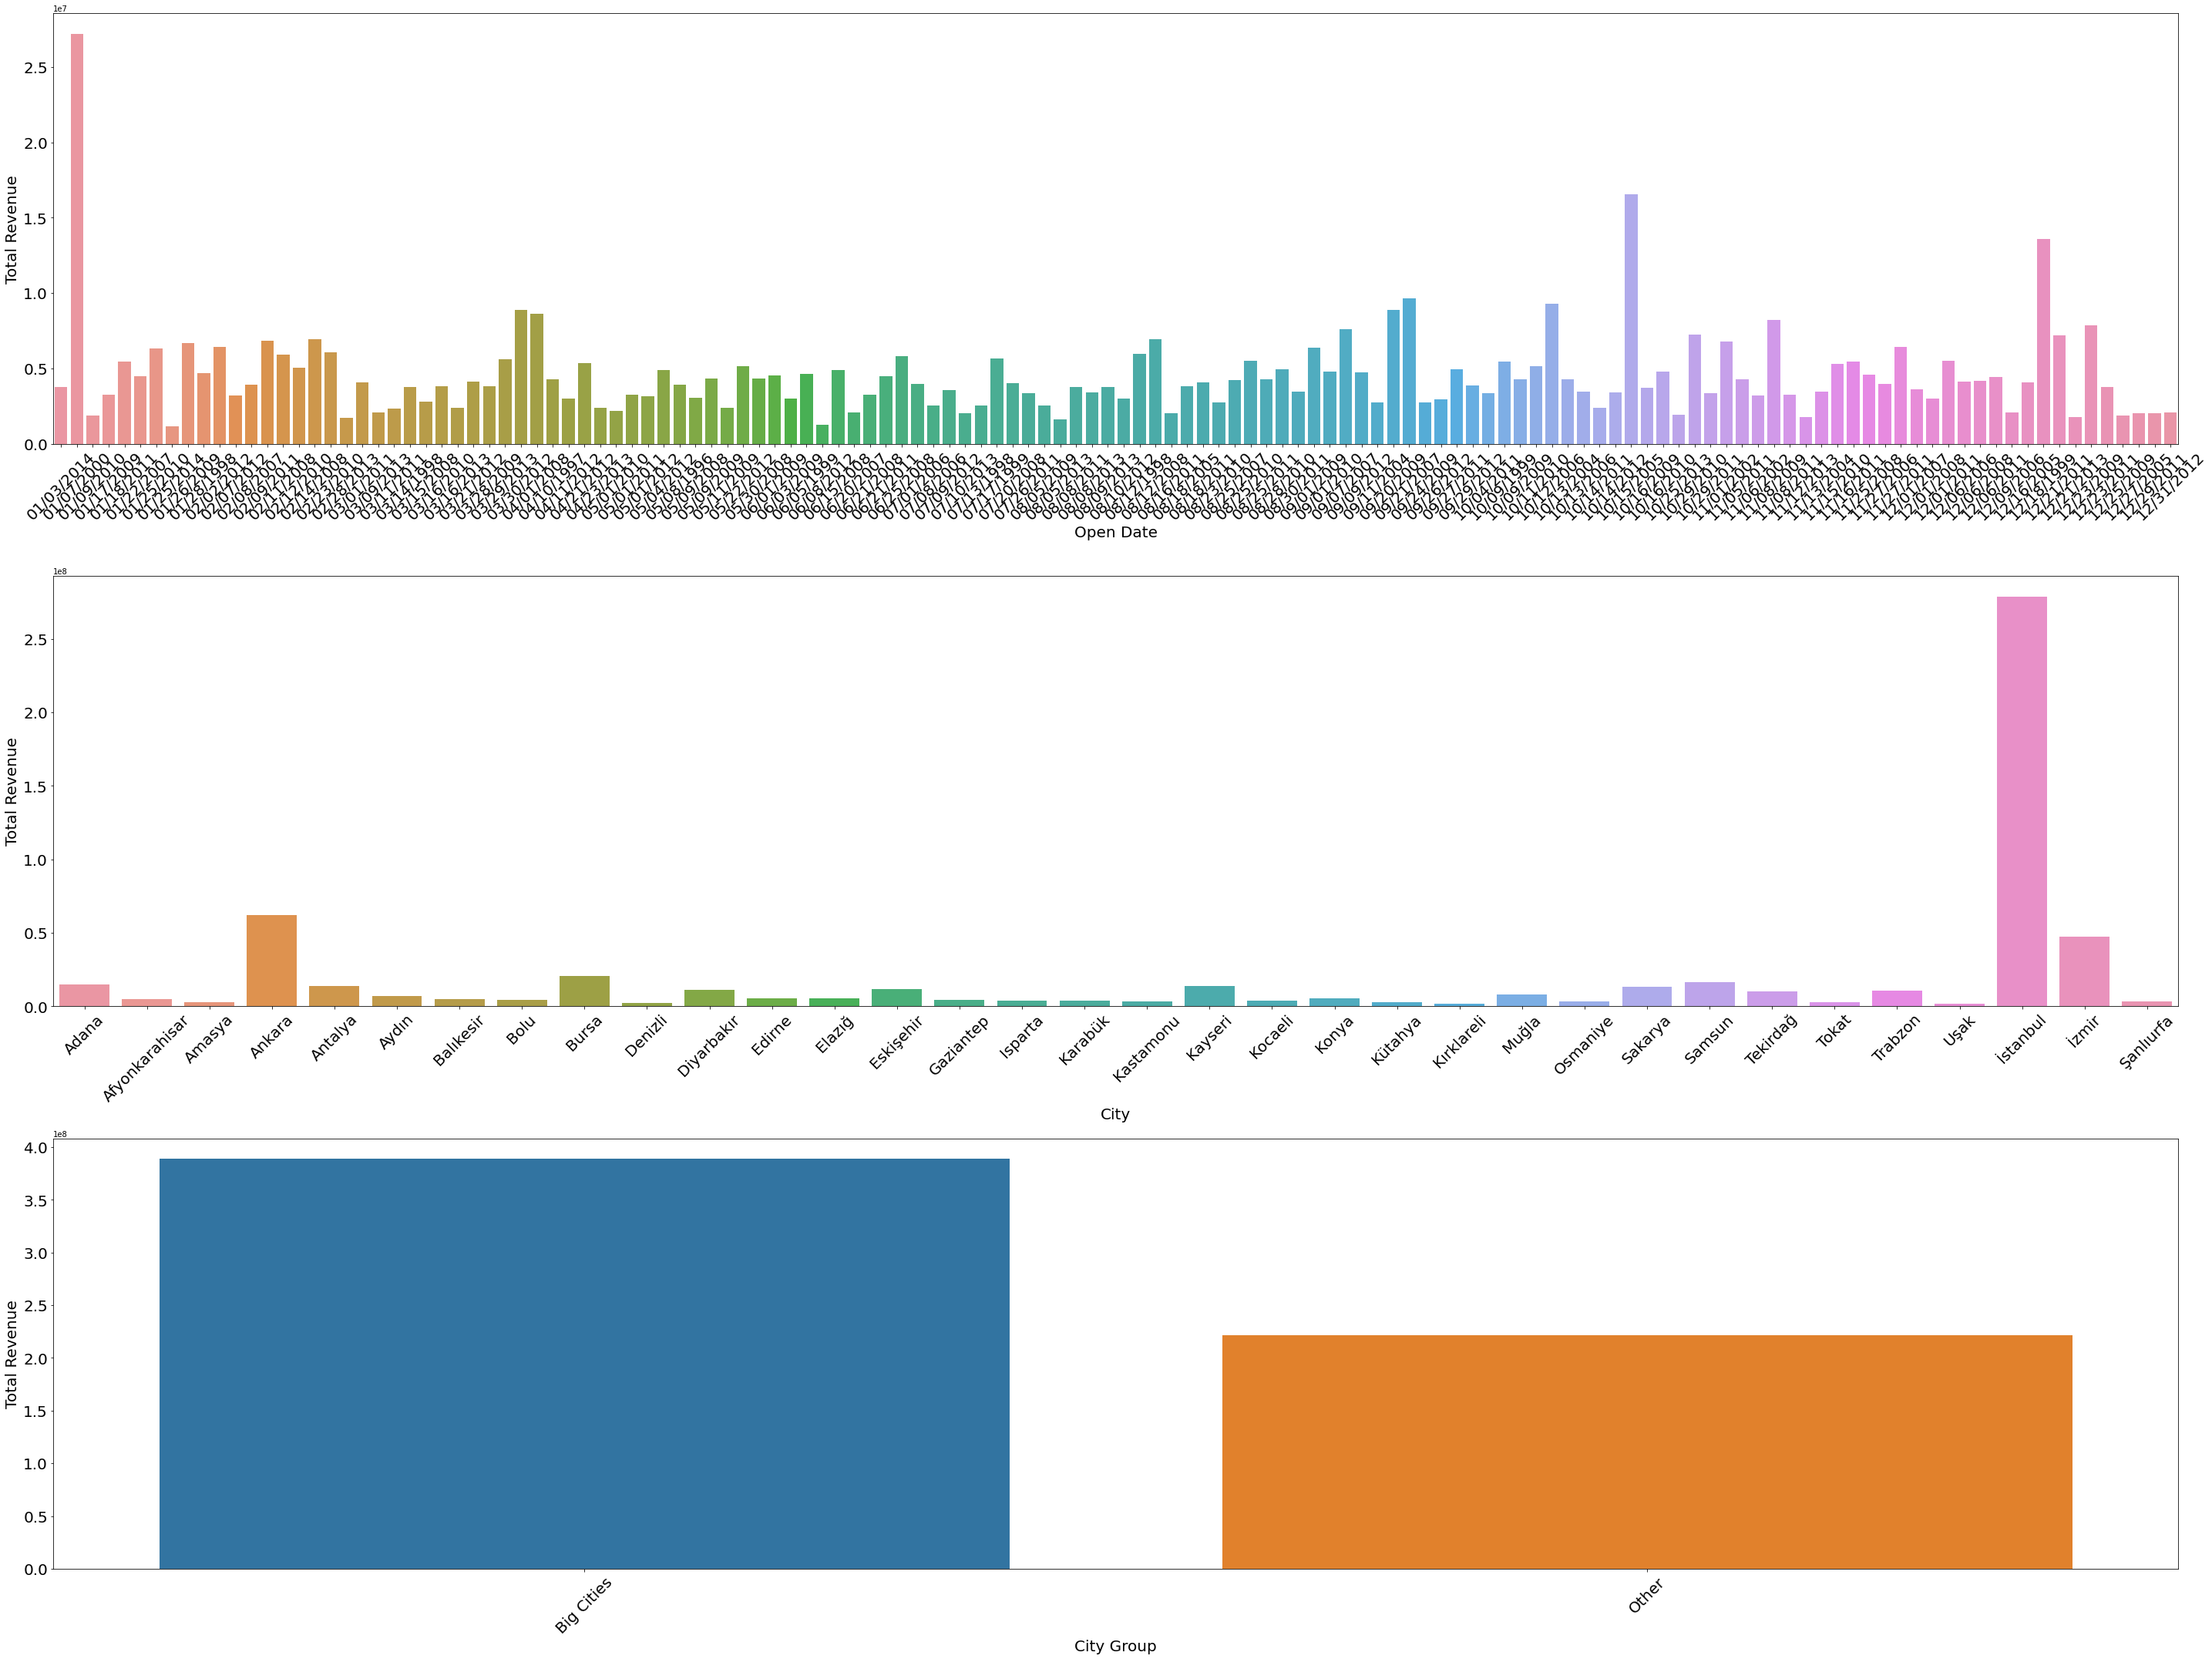

In [192]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    df_2 = res[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Total Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(20)
    for label in subplot.get_yticklabels():
        label.set_size(20)
fig.tight_layout()

#It can be seen from the graphs, the maximum revenue making city is Istanbul. 

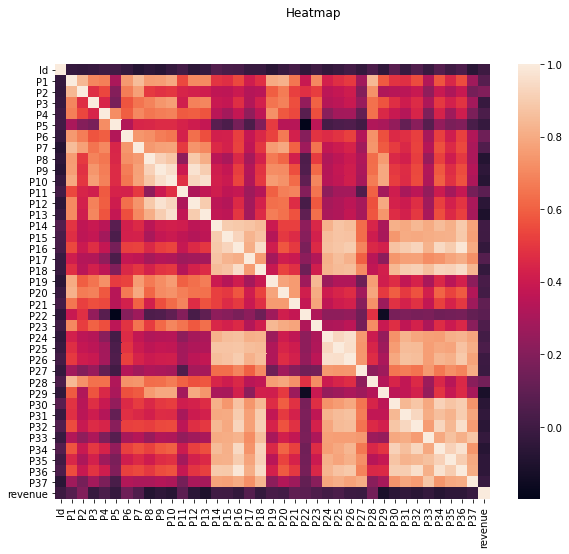

In [194]:
# Correlation features with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(res.corr(), square=True)
plt.suptitle('Heatmap')
plt.show();

# Feature Engineering

In [195]:
# Droppping 'ID' column as it is insignificant

res=res.drop(['Id'],axis=1)

In [196]:
# Adjusting the Date

import datetime
res['Open Date']  = pd.to_datetime(res['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
res['Days Open'] = (launch_date - res['Open Date']).dt.days / 1000
res.drop('Open Date', axis=1, inplace=True)

In [197]:
# One Hot Encoding 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [198]:
le=LabelEncoder()

In [199]:
res['City']=le.fit_transform(res['City'])
res['City Group']=le.fit_transform(res['City Group'])
res['Type']=le.fit_transform(res['Type'])
res['P1']=le.fit_transform(res['P1'])
res['P2']=le.fit_transform(res['P2'])
res['P3']=le.fit_transform(res['P3'])
res['P4']=le.fit_transform(res['P4'])
res['P5']=le.fit_transform(res['P5'])
res['P6']=le.fit_transform(res['P6'])
res['P7']=le.fit_transform(res['P7'])
res['P8']=le.fit_transform(res['P8'])
res['P9']=le.fit_transform(res['P9'])
res['P10']=le.fit_transform(res['P10'])
res['P11']=le.fit_transform(res['P11'])
res['P12']=le.fit_transform(res['P12'])
res['P13']=le.fit_transform(res['P13'])
res['P14']=le.fit_transform(res['P14'])
res['P15']=le.fit_transform(res['P15'])
res['P16']=le.fit_transform(res['P16'])
res['P17']=le.fit_transform(res['P17'])
res['P18']=le.fit_transform(res['P18'])
res['P19']=le.fit_transform(res['P19'])
res['P20']=le.fit_transform(res['P20'])
res['P21']=le.fit_transform(res['P21'])
res['P22']=le.fit_transform(res['P22'])
res['P23']=le.fit_transform(res['P23'])
res['P24']=le.fit_transform(res['P24'])
res['P25']=le.fit_transform(res['P25'])
res['P26']=le.fit_transform(res['P26'])
res['P27']=le.fit_transform(res['P27'])
res['P28']=le.fit_transform(res['P28'])
res['P29']=le.fit_transform(res['P29'])
res['P30']=le.fit_transform(res['P30'])
res['P31']=le.fit_transform(res['P31'])
res['P32']=le.fit_transform(res['P32'])
res['P33']=le.fit_transform(res['P33'])
res['P34']=le.fit_transform(res['P34'])
res['P35']=le.fit_transform(res['P35'])
res['P36']=le.fit_transform(res['P36'])
res['P37']=le.fit_transform(res['P37'])

In [200]:

res['revenue'] = pd.cut(res['revenue'],               
                       2,                             # Two cuts
                       labels=["0","1"]               # Label for each cut
                       )
# Minimum revenue to open a restaurant is $3939804
# Average Revenue $4453532
# Min Revenue - $1149870 
# Max Revenue - $19696939

# Revenue is an important criteria for opening a new restaurant

In [201]:
res['revenue'] = res['revenue'].astype(int)

# Finding Structure in Data

In [202]:
# Selecting only numeric columns for the purpose
num_data = res.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape       
num_data.columns

City  City Group  Type  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  \
0    31           0     2   3   5   3   1   1   1   4   3   1    1    2    3   
1     3           0     1   3   5   3   1   0   1   4   4   1    1    0    3   
2    10           1     2   1   3   1   3   1   2   4   4   1    1    1    3   
3    28           1     2   5   4   6   4   3   3   5   6   3    3    6    6   
4    14           1     2   2   3   2   1   1   1   4   4   1    1    1    3   

   P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  \
0    2    1    2    2    2    3    4    3    0    2    2    1    1    1    5   
1    2    0    0    0    0    0    2    1    0    2    1    0    0    0    0   
2    2    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    4    6    4    6    3    6    7    7    5    0    5    2    2    3    3   
4    2    2    1    2    1    3    1    1    0    1    0    2    3    4    6   

   P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  Days Open  
0    1    4    4    3    4    4    4    4    2    4        0      5.728  
1    3    4    0    0    0    0    0    0    0    0        0      2.594  
2    0    4    0    0    0    0    0    0    0    0        0      0.744  
3    2    6    8    8    6    5    6    6    5    6        0      1.145  
4    0    4    4    1    3    1    2    4    2    3        0      2.144

(137, 42)

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Days Open'],
      dtype='object')

In [203]:
# Columns in num_data that are either discrete (with few levels) or numeric

cols=['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Days Open']##CAN DIVIDE INCOME INTO CATEGORIES AND RUN AS CATEGORICAL.

In [204]:
# Creating an instance of StandardScaler object
ss= StandardScaler()

In [205]:
# Using fit and transform method
nc = ss.fit_transform(num_data.loc[:,cols])

In [206]:
# Transforming numpy array back to pandas dataframe as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

City  City Group      Type        P1        P2        P3        P4  \
0  0.880758   -0.869718  1.117025  0.208266  0.614194 -0.435383 -0.489135   
1 -1.496856   -0.869718 -0.844929  0.208266  0.614194 -0.435383 -0.489135   

         P5        P6        P7        P8   P9       P10       P11       P12  \
0  0.006422 -0.683287  0.177961 -0.687998  0.0 -0.041725 -0.112042 -0.026761   
1 -0.873375 -0.683287  0.177961  0.066048  0.0 -0.041725 -1.292791 -0.026761   

        P13       P14       P15       P16       P17       P18       P19  \
0 -0.024335 -0.121265  0.374297  0.208101  0.613241  0.959687  0.670705   
1 -0.024335 -0.595930 -0.631168 -0.655835 -0.578447 -0.663488 -0.262154   

        P20      P21       P22       P23       P24       P25       P26  \
0  0.028529 -0.69887  0.630997  0.160906 -0.150503 -0.061279 -0.222472   
1 -0.840030 -0.69887  0.630997 -0.318314 -0.619116 -0.620962 -0.623506   

        P27       P28       P29       P30       P31       P32       P33  \
0  1.749098 -0.709035  0.301271  1.131807  0.519634  0.937450  2.520617   
1 -0.595583  0.243296  0.301271 -0.660766 -0.634796 -0.657962 -0.611578   

        P34       P35       P36       P37   revenue  Days Open  
0  1.511250  1.086582  0.453198  1.644301 -0.149626   2.412027  
1 -0.623196 -0.706933 -0.645707 -0.631146 -0.149626   0.274059

In [207]:
nc.shape

(137, 42)

In [208]:
# Add/overwriting few columns that are discrete
nc['City']=res['City']
nc['City Group']=res['City Group']
nc['Type']=res['Type']
nc['P1']=res['P1']
nc['P2']=res['P2']
nc['P3']=res['P3']
nc['P4']=res['P4']
nc['P5']=res['P5']
nc['P6']=res['P6']
nc['P7']=res['P7']
nc['P8']=res['P8']
nc['P9']=res['P9']
nc['P10']=res['P10']
nc['P11']=res['P11']
nc['P12']=res['P12']
nc['P13']=res['P13']
nc['P14']=res['P14']
nc['P15']=res['P15']
nc['P16']=res['P16']
nc['P17']=res['P17']
nc['P18']=res['P18']
nc['P19']=res['P19']
nc['P20']=res['P20']
nc['P21']=res['P21']
nc['P22']=res['P22']
nc['P23']=res['P23']
nc['P24']=res['P24']
nc['P25']=res['P25']
nc['P26']=res['P26']
nc['P27']=res['P27']
nc['P28']=res['P28']
nc['P29']=res['P29']
nc['P30']=res['P30']
nc['P31']=res['P31']
nc['P32']=res['P32']
nc['P33']=res['P33']
nc['P34']=res['P34']
nc['P35']=res['P35']
nc['P36']=res['P36']
nc['P37']=res['P37']
nc['revenue']=res['revenue']
nc.shape

(137, 42)

In [209]:
# Creating a dataframe from random data for comparison purpose

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (137, 42)),
                       columns = cols    
                       )

In [210]:
# Generating random data according to number of categories

nc_rand['City'] = np.random.randint(34,   size= (137,))   
nc_rand['City Group']        = np.random.randint(8,   size= (137,))   
nc_rand['Type']       = np.random.randint(3, size= (137,))   
nc_rand['P1']     = np.random.randint(8,  size= (137,))   
nc_rand['P2']       = np.random.randint(8,   size= (137,))   
nc_rand['P3']     = np.random.randint(8,  size= (137,))   
nc_rand['P4']       = np.random.randint(6,   size= (137,))   
nc_rand['P5']     = np.random.randint(7,  size= (137,))   
nc_rand['P6']       = np.random.randint(8,   size= (137,))   
nc_rand['P7']     = np.random.randint(6,  size= (137,))   
nc_rand['P8']       = np.random.randint(8,   size= (137,))   
nc_rand['P9']     = np.random.randint(4,  size= (137,))   
nc_rand['P10']       = np.random.randint(4,   size= (137,))   
nc_rand['P11']     = np.random.randint(8,  size= (137,))   
nc_rand['P12']       = np.random.randint(7,   size= (137,))   
nc_rand['P13']     = np.random.randint(5,  size= (137,))   
nc_rand['P14']       = np.random.randint(10,   size= (137,))   
nc_rand['P15']     = np.random.randint(8,  size= (137,))   
nc_rand['P16']       = np.random.randint(9,   size= (137,))   
nc_rand['P17']     = np.random.randint(9,  size= (137,))   
nc_rand['P18']       = np.random.randint(7,   size= (137,))   
nc_rand['P19']     = np.random.randint(9,  size= (137,))   
nc_rand['P20']       = np.random.randint(9,   size= (137,))   
nc_rand['P21']     = np.random.randint(8,  size= (137,))   
nc_rand['P22']       = np.random.randint(5,   size= (137,))   
nc_rand['P23']     = np.random.randint(9,  size= (137,))   
nc_rand['P24']       = np.random.randint(9,   size= (137,))   
nc_rand['P25']     = np.random.randint(8,  size= (137,))   
nc_rand['P26']       = np.random.randint(10,   size= (137,))  
nc_rand['P27']     = np.random.randint(7,  size= (137,))   
nc_rand['P28']       = np.random.randint(8,   size= (137,))   
nc_rand['P29']     = np.random.randint(7,  size= (137,))  
nc_rand['P30']       = np.random.randint(9,   size= (137,))   
nc_rand['P31']     = np.random.randint(10,  size= (137,))   
nc_rand['P32']       = np.random.randint(10,   size= (137,))   
nc_rand['P33']       = np.random.randint(6,   size= (137,))   
nc_rand['P34']       = np.random.randint(7,   size= (137,))   
nc_rand['P35']       = np.random.randint(7,   size= (137,))   
nc_rand['P36']       = np.random.randint(8,   size= (137,))   
nc_rand['P37']       = np.random.randint(7,   size= (137,))   
nc_rand['revenue']       = np.random.randint(2,   size= (137,))   
nc_rand.shape    

(137, 42)

<AxesSubplot:>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'City Group'),
  Text(2, 0, 'Type'),
  Text(3, 0, 'P1'),
  Text(4, 0, 'P2'),
  Text(5, 0, 'P3'),
  Text(6, 0, 'P4'),
  Text(7, 0, 'P5'),
  Text(8, 0, 'P6'),
  Text(9, 0, 'P7'),
  Text(10, 0, 'P8'),
  Text(11, 0, 'P9'),
  Text(12, 0, 'P10'),
  Text(13, 0, 'P11'),
  Text(14, 0, 'P12'),
  Text(15, 0, 'P13'),
  Text(16, 0, 'P14'),
  Text(17, 0, 'P15'),
  Text(18, 0, 'P16'),
  Text(19, 0, 'P17'),
  Text(20, 0, 'P18'),
  Text(21, 0, 'P19'),
  Text(22, 0, 'P20'),
  Text(23, 0, 'P21'),
  Text(24, 0, 'P22'),
  Text(25, 0, 'P23'),
  Text(26, 0, 'P24'),
  Text(27, 0, 'P25'),
  Text(28, 0, 'P26'),
  Text(29, 0, 'P27'),
  Text(30, 0, 'P28'),
  Text(31, 0, 'P29'),
  Text(32, 0, 'P30'),
  Text(33, 0, 'P31'),
  Text(34, 0, 'P32'),
  Text(35, 0, 'P33'),
  Text(36, 0, 'P34'),
  Text

Text(0.5, 1.0, 'Parallel chart with random data')

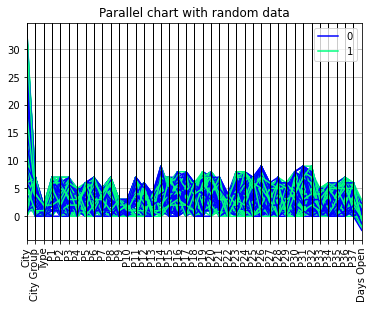

In [211]:
# Plotting Parallel coordinates with random data

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'revenue',   
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'City Group'),
  Text(2, 0, 'Type'),
  Text(3, 0, 'P1'),
  Text(4, 0, 'P2'),
  Text(5, 0, 'P3'),
  Text(6, 0, 'P4'),
  Text(7, 0, 'P5'),
  Text(8, 0, 'P6'),
  Text(9, 0, 'P7'),
  Text(10, 0, 'P8'),
  Text(11, 0, 'P9'),
  Text(12, 0, 'P10'),
  Text(13, 0, 'P11'),
  Text(14, 0, 'P12'),
  Text(15, 0, 'P13'),
  Text(16, 0, 'P14'),
  Text(17, 0, 'P15'),
  Text(18, 0, 'P16'),
  Text(19, 0, 'P17'),
  Text(20, 0, 'P18'),
  Text(21, 0, 'P19'),
  Text(22, 0, 'P20'),
  Text(23, 0, 'P21'),
  Text(24, 0, 'P22'),
  Text(25, 0, 'P23'),
  Text(26, 0, 'P24'),
  Text(27, 0, 'P25'),
  Text(28, 0, 'P26'),
  Text(29, 0, 'P27'),
  Text(30, 0, 'P28'),
  Text(31, 0, 'P29'),
  Text(32, 0, 'P30'),
  Text(33, 0, 'P31'),
  Text(34, 0, 'P32'),
  Text(35, 0, 'P33'),
  Text(36, 0, 'P34'),
  Text

Text(0.5, 1.0, 'Parallel chart with revenue')

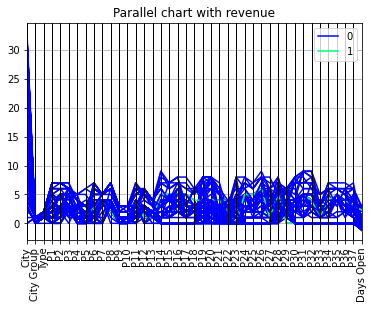

In [280]:
# Plotting Parallel coordinates with revenue data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'revenue',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with revenue")

# In comparison to the plot with random data, we can see that there is a definite structure between the input and the set revenue

<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots with random data')

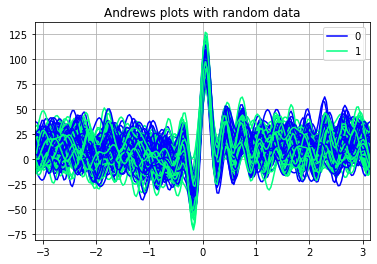

In [281]:
# Plotting Andrews charts with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'revenue',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

<AxesSubplot:>

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Andrews curve with revenue')

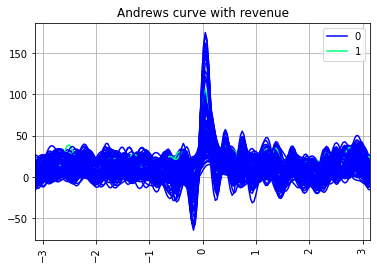

In [282]:
# Andrews plots with ad data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'revenue',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with revenue")

<AxesSubplot:>

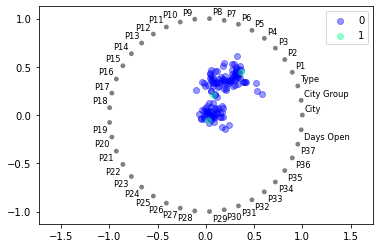

In [283]:
# Radviz plot

fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='revenue',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

# As depicted in the plot, revenue has a greater relation with P1,P2, P5, P9, P29, City Group and type of restaurant

In [216]:
from sklearn.manifold import TSNE

(137, 2)

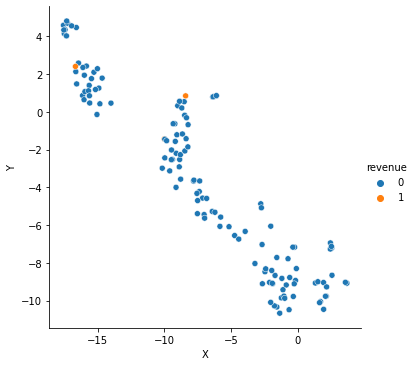

In [284]:
X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape    
dm = pd.DataFrame(X_embedded, columns=['X','Y'])


sns.relplot(x = "X",
            y = "Y",
            hue = nc.revenue,    # Colur each point as per 1 or 0
            data = dm
            )

(137, 2)

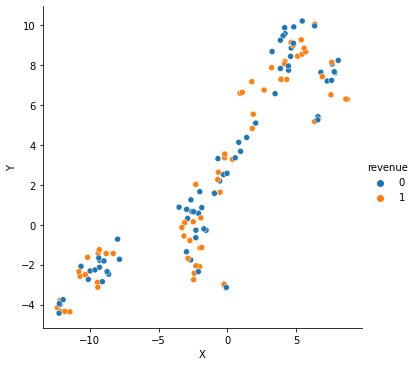

In [285]:
X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape   
dm = pd.DataFrame(X_embedded, columns=['X','Y'])


sns.relplot(x = "X",
            y = "Y",
            hue = nc_rand.revenue,    # Colur each point as per 1 or 0
            data = dm
            )

In [220]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [221]:
import umap.umap_ as umap

In [222]:
reducer = umap.UMAP()

(137, 2)

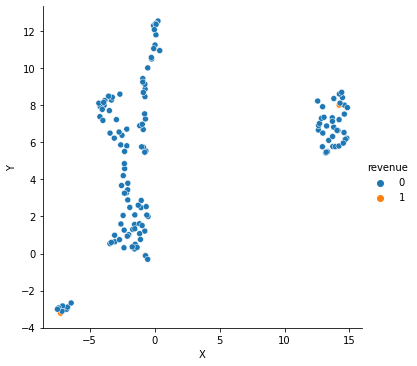

In [286]:
X_embedded = umap.UMAP(n_neighbors=5,
                       min_dist=0.3,
                       metric='correlation').fit_transform(nc.iloc[:,:-1])
X_embedded.shape    
dm = pd.DataFrame(X_embedded, columns=['X','Y'])


sns.relplot(x = "X",
            y = "Y",
            hue = nc.revenue,    # Colur each point as per 1 or 0
            data = dm
            )

(137, 2)

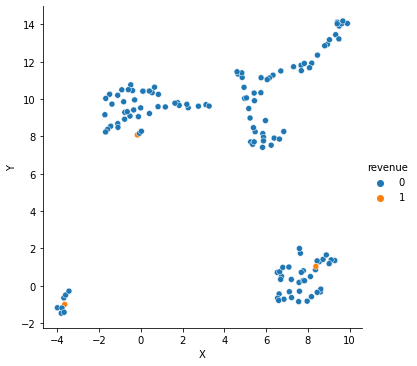

In [224]:
import umap

reducer = umap.UMAP()

# 8.1 Project all data but 'Clicked_on_ad' on two axis
#        Also just replace nc with nc_rand and try again

X_embedded = umap.UMAP(n_neighbors=5,
                       min_dist=0.3,
                       metric='correlation').fit_transform(nc.iloc[:,:-1])
X_embedded.shape    # (1000,2), numpy array
dm = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.revenue,    # Colur each point as per 1 or 0
            data = dm
            )

# Pipelining

In [225]:
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder as onehot

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler as ss

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [226]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [227]:
import plotly.express as px

In [228]:
# 1.11 Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [229]:
# 2.0 Importing warnings module
#     No FutureWarnings display
 
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

In [230]:
num_cols=cols

In [232]:
Pipe.fit_transform(res[num_cols])

array([[ 0.88075847, -0.86971849,  1.11702464, ...,  1.6443005 ,
        -0.1496264 ,  2.41202674],
       [-1.49685552, -0.86971849, -0.8449289 , ..., -0.63114565,
        -0.1496264 ,  0.27405909],
       [-0.90245203,  1.14979733,  1.11702464, ..., -0.63114565,
        -0.1496264 , -0.98798308],
       ...,
       [-0.22313374,  1.14979733, -0.8449289 , ..., -0.63114565,
        -0.1496264 ,  0.67381948],
       [ 0.88075847, -0.86971849, -0.8449289 , ..., -0.63114565,
        -0.1496264 , -0.39993964],
       [ 0.88075847, -0.86971849, -0.8449289 , ..., -0.63114565,
        -0.1496264 , -0.11137541]])

In [233]:
################# CC. Creating pipeline #################
#### Pipe using XGBoost

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        
            )
            ]

In [234]:
pipe_xg = Pipeline(steps_xg)

# Cross Validation

In [235]:
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

# 1.8 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.9
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.10 Permutation feature importance
from sklearn.inspection import permutation_importance

# 1.11 Misc
import time
import os
import gc
import random

# 1.12 Used in Randomized parameter search
from scipy.stats import uniform

# 1.13
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.14 Set option to dislay many rows
pd.set_option('display.max_columns', 100)

In [236]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [237]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [238]:
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

In [239]:
X_train=res.drop('revenue', axis=1)

In [240]:
y_train=res.revenue

In [241]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
X=X_train
Y=y_train
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96428571 1.         0.96296296 0.96296296 1.        ]
Average Cross Validation score :0.978042328042328


# Hyperparameter tuning both using Grid Search and Randomized Search


In [242]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

In [243]:
# 6.3 Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               

In [244]:
# 6.3.1 Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  
                                                  
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [25,30],
               }                               

In [245]:
# 7  Grid Search (16 * 2) iterations
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [247]:
res_test=pd.read_csv('Restaurant Revenue Test.csv')

In [249]:
res_test=res_test.drop(['Id'],axis=1)

In [250]:
#adjust the date
import datetime
res_test['Open Date']  = pd.to_datetime(res_test['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
res_test['Days Open'] = (launch_date - res_test['Open Date']).dt.days / 1000
res_test.drop('Open Date', axis=1, inplace=True)

In [251]:
#One hot encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [252]:
le=LabelEncoder()

In [253]:
res_test['City']=le.fit_transform(res_test['City'])
res_test['City Group']=le.fit_transform(res_test['City Group'])
res_test['Type']=le.fit_transform(res_test['Type'])
res_test['P1']=le.fit_transform(res_test['P1'])
res_test['P2']=le.fit_transform(res_test['P2'])
res_test['P3']=le.fit_transform(res_test['P3'])
res_test['P4']=le.fit_transform(res_test['P4'])
res_test['P5']=le.fit_transform(res_test['P5'])
res_test['P6']=le.fit_transform(res_test['P6'])
res_test['P7']=le.fit_transform(res_test['P7'])
res_test['P8']=le.fit_transform(res_test['P8'])
res_test['P9']=le.fit_transform(res_test['P9'])
res_test['P10']=le.fit_transform(res_test['P10'])
res_test['P11']=le.fit_transform(res_test['P11'])
res_test['P12']=le.fit_transform(res_test['P12'])
res_test['P13']=le.fit_transform(res_test['P13'])
res_test['P14']=le.fit_transform(res_test['P14'])
res_test['P15']=le.fit_transform(res_test['P15'])
res_test['P16']=le.fit_transform(res_test['P16'])
res_test['P17']=le.fit_transform(res_test['P17'])
res_test['P18']=le.fit_transform(res_test['P18'])
res_test['P19']=le.fit_transform(res_test['P19'])
res_test['P20']=le.fit_transform(res_test['P20'])
res_test['P21']=le.fit_transform(res_test['P21'])
res_test['P22']=le.fit_transform(res_test['P22'])
res_test['P23']=le.fit_transform(res_test['P23'])
res_test['P24']=le.fit_transform(res_test['P24'])
res_test['P25']=le.fit_transform(res_test['P25'])
res_test['P26']=le.fit_transform(res_test['P26'])
res_test['P27']=le.fit_transform(res_test['P27'])
res_test['P28']=le.fit_transform(res_test['P28'])
res_test['P29']=le.fit_transform(res_test['P29'])
res_test['P30']=le.fit_transform(res_test['P30'])
res_test['P31']=le.fit_transform(res_test['P31'])
res_test['P32']=le.fit_transform(res_test['P32'])
res_test['P33']=le.fit_transform(res_test['P33'])
res_test['P34']=le.fit_transform(res_test['P34'])
res_test['P35']=le.fit_transform(res_test['P35'])
res_test['P36']=le.fit_transform(res_test['P36'])
res_test['P37']=le.fit_transform(res_test['P37'])

In [254]:
X_test=res_test

In [255]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[22:39:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      intera...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=3,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=2,
             param_grid={'pca__n_components': [25, 30],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.18155928452809653

In [256]:
# 7.3
f"Best score: {clf.best_score_} "            

# 7.3.1
print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.4477611940298507 '

"Best parameter set {'pca__n_components': 30, 'xg__learning_rate': 0.05, 'xg__max_depth': 4}"

Augmentation

In [257]:
# 7.4. Making predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([0, 0, 0, 0])

In [258]:
# 7.9 To get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(30,)



---Feature importances---



array([0.        , 0.        , 0.1837146 , 0.        , 0.12814935,
       0.11963351, 0.        , 0.        , 0.        , 0.        ,
       0.04539515, 0.10464131, 0.        , 0.04732045, 0.        ,
       0.12863669, 0.05372339, 0.04872314, 0.        , 0.02000895,
       0.04864453, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02391965, 0.04748924, 0.        ],
      dtype=float32)

# Random Search

In [259]:
##################### EE. Randomized Search #################

# Tuning parameters using randomized search
# 9.0 Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(20,30)}

In [260]:
# 9.1 Tuning parameters using random search
#     Creating the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [261]:
# 9.2 Running random search for 25 iterations.

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[22:39:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,...
                                                            predictor=None,
                                                            random_state=None,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(20, 30),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f813f096b50>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)},
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=1)

0.011632299423217774

In [262]:
# 9.3 Evaluation
f"Best score: {rs.best_score_} " ;print()           # 'Best score: 0.8780097831252602 '
f"Best parameter set: {rs.best_params_} " ; print()


# 9.4 Making predictions from the best returned model
y_pred = rs.predict(X_test)



'Best score: 0.5708955223880597 '

"Best parameter set: {'pca__n_components': 23, 'xg__learning_rate': 0.18620579008416116, 'xg__max_depth': 9, 'xg__n_estimators': 94} "

# Bayesian Optimisation

In [263]:
# 10.0 Laydown search space of parameters     


params={
         'min_child_weight': Integer(0, 50),
         'max_depth': Integer(1, 10),
         'subsample': Real (0.5, 1.0, 'uniform'),
         'colsample_bytree': Real(0.5, 1.0, 'uniform'),
         'reg_lambda':Real(1e-5,100,prior = 'log-uniform'),
         'reg_alpha': Real(1e-5,100,prior= 'log-uniform'),
         'gamma': Real(1e-9, 0.5, 'log-uniform'),
         'learning-rate': Real(0.01,0.2,prior='log-uniform'),
         'scale_pos_weight': Real(1e-6, 500, 'log-uniform'),
         'n_estimators': Integer(50, 100)
        }

In [264]:
# 10.1 Define our classifier:
bayes_tuner=BayesSearchCV(
                            XGBClassifier(
                                            n_jobs = 1,
                                            objective = 'binary:logistic',
                                            eval_metric = 'auc',
                                            silent=1,
                                            tree_method='approx'
                                            ),
                            params,
                            n_iter=5,              # No of parameter settings that are tried 
                            scoring='roc_auc',     # List of scores CANNOT be used
                            cv = StratifiedKFold(
                                                  n_splits=3,
                                                  shuffle=True,
                                                  random_state=42
                                                ),
                            refit = True, # Refit the best estimator so as to make predictions
                            verbose = 1,
                            return_train_score= True
                    )

In [265]:
# 10.2 This function is called after each parameter
#      fitting to print current status:

def status_print(optim_result):
  """Status callback durring bayesian hyperparameter search"""

  # 10.2.1 Get all the models tested so far in DataFrame format
  # cv_results_: A dict with keys as column headers and
  #              values as columns
  #        model_results dataframe is not being printed
  model_results = pd.DataFrame(bayes_tuner.cv_results_)    
  
  # 10.2.2 Get current parameters and the best parameters   
  # best_params_: A dict of parameter settings that 
  #               give the best results on the hold out data. 
  best_params = pd.Series(bayes_tuner.best_params_)
  
  print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(model_results),
        np.round(bayes_tuner.best_score_, 4),  # Score of best_estimator on the left out data.
        bayes_tuner.best_params_
    ))

In [266]:
# 11.0 Begin parameter tuning

start = time.time()
res=bayes_tuner.fit(
                      X_train,
                      y_train,
                      #callback=status_print
                    )

end = time.time()
(end - start)/60   # 3 minutes on Colab

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[22:39:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "learning-rate", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "learning-rate", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[

0.02810732920964559

In [267]:
# 11.1 Get results
res.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8192170207034191, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc',
              gamma=0.00010253758231305721, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning-rate=0.07141733702494384, learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
              max_leaves=0, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=55, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=9.516595844541431, ...)

In [268]:
# 11.2
res.best_score_

0.8925925925925925

In [269]:
# 11.3
res.best_params_

OrderedDict([('colsample_bytree', 0.8192170207034191),
             ('gamma', 0.00010253758231305721),
             ('learning-rate', 0.07141733702494384),
             ('max_depth', 5),
             ('min_child_weight', 6),
             ('n_estimators', 55),
             ('reg_alpha', 9.516595844541431),
             ('reg_lambda', 0.0025633683085610577),
             ('scale_pos_weight', 230.32915573516388),
             ('subsample', 0.8731135169296431)])

In [270]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [271]:
opening=np.where(y_pred==1)

In [272]:
result=pd.read_csv('Restaurant Revenue Test.csv')

In [273]:
City_List=result['City'][opening[0]]
City_List

65             İstanbul
84             İstanbul
661            İstanbul
670            İstanbul
994              Ankara
1011           İstanbul
1351           İstanbul
1372           İstanbul
1467           İstanbul
1805           İstanbul
2046           İstanbul
2220           İstanbul
2587           İstanbul
3648           İstanbul
4612           İstanbul
5717              İzmir
5998           İstanbul
6273           İstanbul
6477           İstanbul
6497              İzmir
6963           İstanbul
7371           İstanbul
8507          Balıkesir
8733           İstanbul
9367             Ankara
10037          İstanbul
10340             İzmir
10742             İzmir
10764            Ankara
11153          İstanbul
11597          İstanbul
12136          İstanbul
12389          İstanbul
12631             İzmir
12945          İstanbul
12961          İstanbul
13064          İstanbul
13634          İstanbul
13960             İzmir
14836             İzmir
14876             İzmir
14922          İ

In [274]:
Type1=result['Type'][opening[0]]
Type1

65       DT
84       IL
661      IL
670      IL
994      IL
1011     IL
1351     FC
1372     FC
1467     IL
1805     IL
2046     FC
2220     FC
2587     FC
3648     IL
4612     FC
5717     IL
5998     DT
6273     IL
6477     FC
6497     IL
6963     IL
7371     IL
8507     IL
8733     FC
9367     IL
10037    IL
10340    IL
10742    FC
10764    FC
11153    IL
11597    FC
12136    IL
12389    IL
12631    IL
12945    IL
12961    IL
13064    IL
13634    FC
13960    IL
14836    FC
14876    IL
14922    IL
14938    FC
15270    IL
15480    IL
16019    FC
16047    IL
17408    IL
17476    IL
18307    FC
18562    FC
19378    IL
19973    IL
19983    FC
20545    DT
22412    IL
22474    FC
22571    DT
22752    FC
22847    FC
23463    IL
24077    IL
24932    IL
24962    IL
25327    IL
25551    FC
25899    IL
26336    IL
26623    IL
26970    IL
28033    IL
28101    FC
28233    IL
28385    IL
28834    IL
29658    IL
30237    IL
30313    IL
30811    IL
31584    IL
31917    FC
31940    FC
32555    IL
3299

In [276]:
City_List.value_counts().sum()

237

In [277]:
pd.set_option('display.max_rows', None)
City_List.append(Type1)

65             İstanbul
84             İstanbul
661            İstanbul
670            İstanbul
994              Ankara
1011           İstanbul
1351           İstanbul
1372           İstanbul
1467           İstanbul
1805           İstanbul
2046           İstanbul
2220           İstanbul
2587           İstanbul
3648           İstanbul
4612           İstanbul
5717              İzmir
5998           İstanbul
6273           İstanbul
6477           İstanbul
6497              İzmir
6963           İstanbul
7371           İstanbul
8507          Balıkesir
8733           İstanbul
9367             Ankara
10037          İstanbul
10340             İzmir
10742             İzmir
10764            Ankara
11153          İstanbul
11597          İstanbul
12136          İstanbul
12389          İstanbul
12631             İzmir
12945          İstanbul
12961          İstanbul
13064          İstanbul
13634          İstanbul
13960             İzmir
14836             İzmir
14876             İzmir
14922          İ

Final Viewpoints
The number of restaurants to be opened along with the cities are- 

In [275]:
City_List.value_counts()

İstanbul          185
İzmir              30
Ankara             12
Uşak                2
Muğla               1
Manisa              1
Bilecik             1
Çanakkale           1
Afyonkarahisar      1
Tekirdağ            1
Mersin              1
Balıkesir           1
Name: City, dtype: int64